In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train,_),(x_test,_) = tf.keras.datasets.mnist.load_data()

In [4]:
# Normalize pixel values (0-1)
x_train = x_train/ 255.0
x_test = x_test / 255.0

# Add channel dimension in the last axis
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [5]:
# Build the Encoder
encoder = models.Sequential([
    layers.InputLayer(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', strides = 2, padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', strides = 2, padding='same'),
    layers.Flatten(),
    layers.Dense(64,activation='relu')
])

# Build the Decoder
decoder = models.Sequential([
    layers.InputLayer(shape=(64,)),
    layers.Dense(7 * 7 * 64, activation='relu'),
    layers.Reshape((7, 7, 64)),
    layers.Conv2DTranspose(64, (3, 3), activation='relu', strides=2, padding='same'),
    layers.Conv2DTranspose(32, (3, 3), activation='relu', strides=2, padding='same'),
    layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

In [6]:
# Build the complete Autoencoder
autoencoder = models.Sequential([encoder, decoder])

In [7]:
autoencoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 64)             │       219,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28, 1)      │       259,521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 479,105 (1.83 MB)

 Trainable params: 479,105 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
encoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,584 (857.75 KB)

 Trainable params: 219,584 (857.75 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
decoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 3136)           │       203,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,521 (1013.75 KB)

 Trainable params: 259,521 (1013.75 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [11]:
# Train the autoencoder
autoencoder.fit(
    x_train, x_train,  # Input and target are the same for autoencoders
    epochs=10,
    batch_size=128,
    validation_data=(x_test, x_test)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - loss: 0.1571 - val_loss: 0.0873
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 0.0804 - val_loss: 0.0755
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 0.0745 - val_loss: 0.0722
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 0.0720 - val_loss: 0.0706
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.0706 - val_loss: 0.0702
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.0697 - val_loss: 0.0688
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 0.0691 - val_loss: 0.0683
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - loss: 0.0686 - val_loss: 0.0679
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - loss: 0.0681 - val_loss: 0.0674
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.0677 - val_loss: 0.0672


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


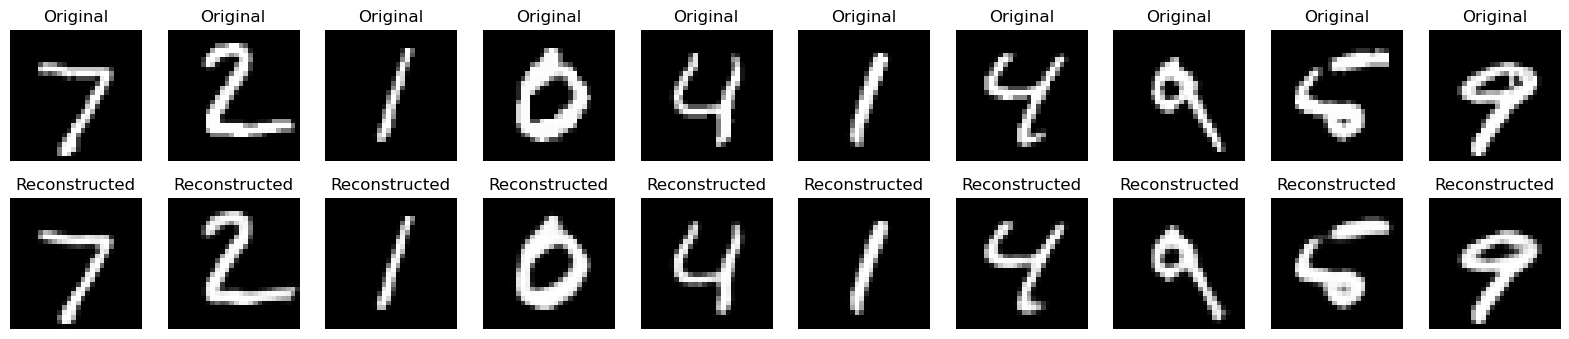

In [12]:
# Predict on test set
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")
    
    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()